# Find Teleconnections (precursor regions) via correlation maps 

In [1]:
import os
from RGCPD import RGCPD
from RGCPD import BivariateMI
from RGCPD import class_BivariateMI, functions_pp, core_pp
from IPython.display import Image
import numpy as np
import pandas as pd

/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/svijverber/.conda/envs/RGCPD/lib/python3.8/site-packages/tigramite/plotting.py:26: UserWarning: No module named 'networkx'
  warnings.warn(str(e))


In [2]:
path_obs_data = '/data/volume_2/observational/'

target = core_pp.import_ds_lazy(os.path.join(path_obs_data, 'raw', 'chrips_precip_1981-2021.nc'))
hoa_mask = core_pp.import_ds_lazy(os.path.join(path_obs_data, 'chirps_hoa_dry_mask_0.25deg.nc'))
target_timeseries = target.where(hoa_mask).mean(dim=('latitude', 'longitude'))

df_target = target_timeseries.to_dataframe()[['precip']]

# define input by filling list_of_name_path: 
# format list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
list_of_name_path = [('', df_target),
                    ('sst', os.path.join(path_obs_data, 'raw', 'era5_sst_1959-2021_1_12_daily_2.0deg.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', 
                           alpha=.01, FDR_control=True, lags=np.array([1,2]), 
                           distance_eps=700, min_area_in_degrees2=5)]

sorting longitude


# Time-handling subseasonal mode (OND)

In [3]:
rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=21, # <- subseasonal forecasting mode, all data will be aggregated to 10-day means
           start_end_TVdate=('10-01', '12-31'), # <- defining target period 
           start_end_year=(1981, 2021),
           path_outmain='./output_lorentz')

In [4]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst



Option for pp_precursors to vary pre-processing of datasets by given a list as an argument:
An example: detrend=[True, {'sm1':False, 'sm2':False}]. This input means that default argument is True, except the variables sm1 and sm2 got a different argument. The precursor names sm1 and sm2 should refer to the names given in list_of_name_path.

### Post-processing Target Variable

Start linear detrending ...
Done
Visual test on 0th observationusing absolute anomalies w.r.t. climatology of smoothed concurrent day accross years
original tfreq of imported response variable is converted to desired 21 (daily) means


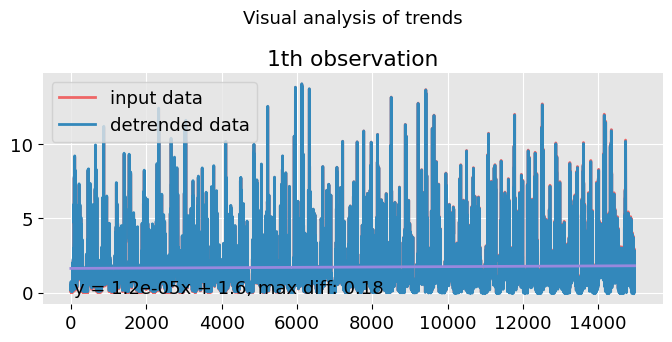

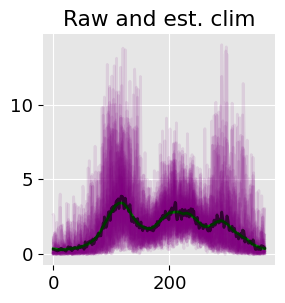

In [5]:
rg.pp_TV(detrend=True, anomaly=True)

In [6]:
rg.df_fullts

,precip
1981-01-19,-0.149501
1981-02-09,0.122153
1981-03-02,0.124322
1981-03-23,2.815058
1981-04-13,1.689720
...,...
2021-09-28,0.491127
2021-10-19,-1.017062
2021-11-09,-1.122142
2021-11-30,-0.261242


In [7]:
rg.traintest(method='leave_10', gap_prior=1, gap_after=1, seed=2)
# rg._get_testyrs()[0] # see test years

In [8]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(120dp, 73%)



Plotting sst
Plotting Corr maps sst, split 0, lag 1
Plotting Corr maps sst, split 0, lag 2


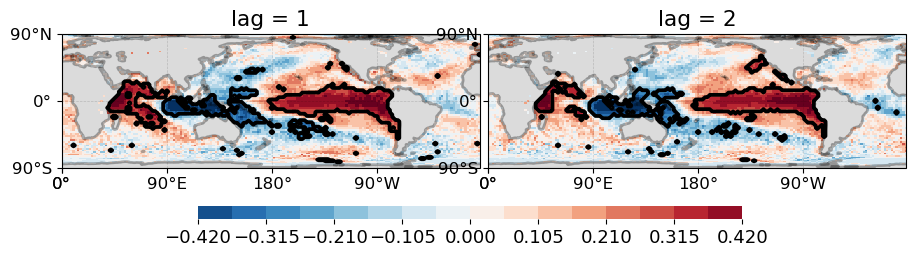

In [9]:
rg.plot_maps_corr()

In [10]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 0, lag 1
Plotting Corr maps sst_labels_init, split 0, lag 2


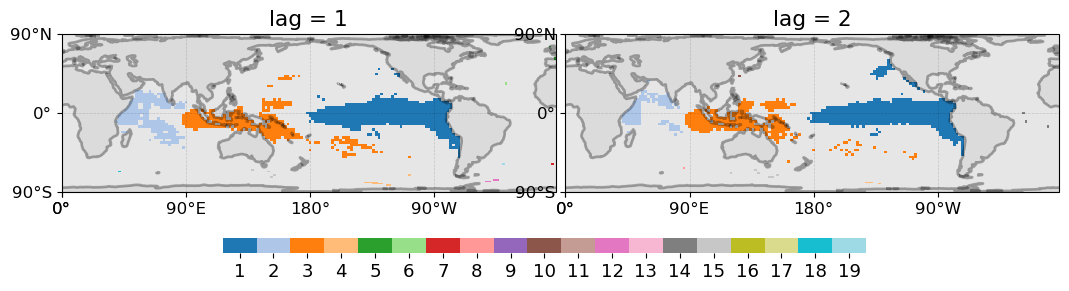

In [11]:
rg.quick_view_labels(mean=True) 

In [12]:
rg.get_ts_prec()


Getting MI timeseries
There are [25, 21, 29, 30] regions in total (list of different splits)


From the correlation (BivariateMI) map, the timeseries are named according the format:
{lag}..{region label}..{precursor name}, where precursor name is defined in list_of_name_path. 

In [13]:
rg.df_data

precip  1..1..sst  1..2..sst  1..3..sst  1..4..sst  1..5..sst  \
0 1981-01-19 -0.149501  -0.674619  -0.004726  -0.167947   0.166185  -0.424412   
  1981-02-09  0.122153  -0.710158  -0.088562  -0.181608   0.190524  -0.279879   
  1981-03-02  0.124322  -0.564523  -0.090129  -0.141239   0.203701  -0.111086   
  1981-03-23  2.815058  -0.227742  -0.036241  -0.187599   0.379013  -0.022285   
  1981-04-13  1.689720  -0.306723  -0.087602  -0.084186   0.220274   0.203162   
...                ...        ...        ...        ...        ...        ...   
3 2021-09-28  0.491127  -0.463533  -0.136382   0.386732  -0.048712   0.271021   
  2021-10-19 -1.017062  -0.673031  -0.160584   0.535541  -0.124277   0.126409   
  2021-11-09 -1.122142  -0.685478  -0.082962   0.472273  -0.185524   0.071708   
  2021-11-30 -0.261242  -0.872187  -0.030866   0.404932  -0.158795  -0.174438   
  2021-12-21  0.232801  -0.906930   0.136127   0.325897  -0.190537  -0.156445   

              1..6..sst  1..7..sst  1..10..sst  1..12..sst  ...  1..8..sst  \
0 1981-01-19   0.494049  -0.472413   -0.464299    0.154733  ...        NaN   
  1981-02-09   0.490203  -0.378209   -0.271384   -0.023419  ...        NaN   
  1981-03-02   0.342924  -0.229390   -0.285298    0.109233  ...        NaN   
  1981-03-23   0.935858  -0.186394   -0.240797    0.050523  ...        NaN   
  1981-04-13   0.308103  -0.276861    0.195882    0.171864  ...        NaN   
...                 ...        ...         ...         ...  ...        ...   
3 2021-09-28   0.186828  -0.141913    0.443405    0.212154  ...        NaN   
  2021-10-19   0.173011   0.074080    0.641267    0.228041  ...        NaN   
  2021-11-09   0.342426  -0.089994    0.319633    0.219409  ...        NaN   
  2021-11-30   0.285398   0.129244    0.147273    0.075865  ...        NaN   
  2021-12-21   0.009453   0.045473   -0.046836   -0.093300  ...        NaN   

              1..9..sst  1..11..sst  1..17..sst  2..11..sst  2..16..sst  \
0 1981-01-19        NaN         NaN         NaN         NaN         NaN   
  1981-02-09        NaN         NaN         NaN         NaN         NaN   
  1981-03-02        NaN         NaN         NaN         NaN         NaN   
  1981-03-23        NaN         NaN         NaN         NaN         NaN   
  1981-04-13        NaN         NaN         NaN         NaN         NaN   
...                 ...         ...         ...         ...         ...   
3 2021-09-28   0.213725   -0.232757    0.069266   -0.369335   -0.060977   
  2021-10-19  -0.055442   -0.378936    0.057066   -0.654661   -0.115723   
  2021-11-09  -0.133070   -0.233850    0.197378   -0.398825   -0.160231   
  2021-11-30  -0.128500   -0.281887    0.285294   -0.438252   -0.315019   
  2021-12-21  -0.125650   -0.328978   -0.068998   -0.465975   -0.388223   

              2..17..sst  2..18..sst  TrainIsTrue  RV_mask  
0 1981-01-19         NaN         NaN            0    False  
  1981-02-09         NaN         NaN            0    False  
  1981-03-02         NaN         NaN            0    False  
  1981-03-23         NaN         NaN            0    False  
  1981-04-13         NaN         NaN            0    False  
...                  ...         ...          ...      ...  
3 2021-09-28         NaN   -0.027914            0    False  
  2021-10-19         NaN    0.022206            0     True  
  2021-11-09         NaN    0.084188            0     True  
  2021-11-30         NaN   -0.141923            0     True  
  2021-12-21         NaN   -0.185850            0     True  

[2788 rows x 39 columns]

## Train-test cross-validation and Response Variable mask handling

- The different train-test folds are organized in the first level index.
- Each fold contains precursor timeseries that were extracted from only training data.
- The Training data is specified by the TrainIsTrue mask.
- The Response Variable mask defined the dates to predict 
- The RV_mask the anker for lag shifting the precursors.

The last two columns should be always present. 
- The RV_mask is defined by the start_end_TVdate.
- The TrainIsTrue is defined by the method for cross-validation.


In [14]:
# Example lag shifting
from RGCPD.forecasting import func_models as fc_utils
fc_utils.apply_shift_lag(rg.df_splits.loc[0].copy(), lag_i=1)

,TrainIsTrue,x_fit,y_fit,x_pred,y_pred
1981-01-19,0,False,False,False,False
1981-02-09,0,False,False,False,False
1981-03-02,0,False,False,False,False
1981-03-23,0,False,False,False,False
1981-04-13,0,False,False,False,False
...,...,...,...,...,...
2021-09-28,1,True,False,True,False
2021-10-19,1,True,True,True,True
2021-11-09,1,True,True,True,True
2021-11-30,1,True,True,True,True


# Forecasting pipeline 1

In [ ]:
from RGCPD.forecasting import func_models as fc_utils
from RGCPD.forecasting.stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV


# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
prediction = 'events' ; q = .33 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                   'kfold':5,
                   'alpha':alphas} # large a, strong regul.
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

    

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        
    
out = rg.fit_df_data_ridge(target=target_ts,
                           keys=None,
                           fcmodel=model,
                           kwrgs_model=kwrgs_model,
                           transformer=False,
                           tau_min=1, tau_max=3)
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 1
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
              'RMSE {:.2f}\n'.format(df_test_m.loc[0][lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_test_m.loc[0][lag]['MAE']),
              'corrcoef {:.2f}'.format(df_test_m.loc[0][lag]['corrcoef']),
              '\nTrain score\n',
              'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['MAE']),
              'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[lag]['corrcoef']))

In [ ]:
df_test_m.loc[0].plot.bar(rot=0, color=['blue', 'green', 'purple'], figsize=(10,4))

In [ ]:
from RGCPD.forecasting.stat_models import plot_importances
coeff, fig = plot_importances(models_splits_lags=model_lags, lag=1)
fig

## Causal Discovery using Tigramite

In [ ]:
rg.PCMCI_df_data(tigr_function_call='run_pcmci',
                 kwrgs_tigr={'tau_min': 0,
                             'tau_max': 1,
                             'pc_alpha': 0.05,
                             'max_conds_dim': 2,
                             'max_combinations': 2,
                             'max_conds_py': 2,
                             'max_conds_px': 2})

In [ ]:
rg.PCMCI_get_links()

In [ ]:
# rg.PCMCI_get_links(var=rg.TV.name, alpha_level=.05)
# rg.df_links

In [ ]:
# on the left you see all the extraction precursor regions, on the right you see the regions which were found Conditionally Dependent (~Causal)
# rg.plot_maps_sum()